In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy
import scipy.spatial
import seaborn as sns
sns.set_theme(style="white", palette="pastel")
import warnings
from sklearn.datasets import make_blobs
from itertools import cycle
warnings.filterwarnings('ignore')
%matplotlib inline

In [245]:
df = pd.read_csv("Dataset3.csv", sep=';')

In [246]:
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [247]:
df.shape

(51, 9)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [249]:
df["Level of development"]=pd.get_dummies(df["Level of development"], drop_first=True)
df["European Union Membership"]=pd.get_dummies(df["European Union Membership"], drop_first=True)
df["Currency"]=pd.get_dummies(df["Currency"], drop_first=True)
df.head()


,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,0,0,0,54.9,64.9,0.90,67.1
1,6,Belgium,0,0,0,63.6,65.5,0.60,58.0
2,17,Estonia,0,0,0,55.4,60.2,-0.88,68.5
3,18,Finland,0,0,0,66.4,65.7,-0.20,67.7
4,19,France,0,0,0,68.8,67.3,0.00,60.6


In [250]:
for i in range(len(df)):
    if(df.iloc[i, 2]==0):
        df.iloc[i, 2]=1
    elif(df.iloc[i, 2]==1):
        df.iloc[i, 2]=0
    if(df.iloc[i, 3]==0):
        df.iloc[i, 3]=1
    elif(df.iloc[i, 3]==1):
        df.iloc[i, 3]=0
    if(df.iloc[i, 4]==0):
        df.iloc[i, 4]=1
    elif(df.iloc[i, 4]==1):
        df.iloc[i, 4]=0
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,1,1,1,54.9,64.9,0.90,67.1
1,6,Belgium,1,1,1,63.6,65.5,0.60,58.0
2,17,Estonia,1,1,1,55.4,60.2,-0.88,68.5
3,18,Finland,1,1,1,66.4,65.7,-0.20,67.7
4,19,France,1,1,1,68.8,67.3,0.00,60.6


In [251]:
df_alterado = df.drop(['No'],axis=1)
df_alterado = df_alterado.drop(['Country'],axis=1)


In [252]:
df_alterado.head()

,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,1,1,1,54.9,64.9,0.90,67.1
1,1,1,1,63.6,65.5,0.60,58.0
2,1,1,1,55.4,60.2,-0.88,68.5
3,1,1,1,66.4,65.7,-0.20,67.7
4,1,1,1,68.8,67.3,0.00,60.6


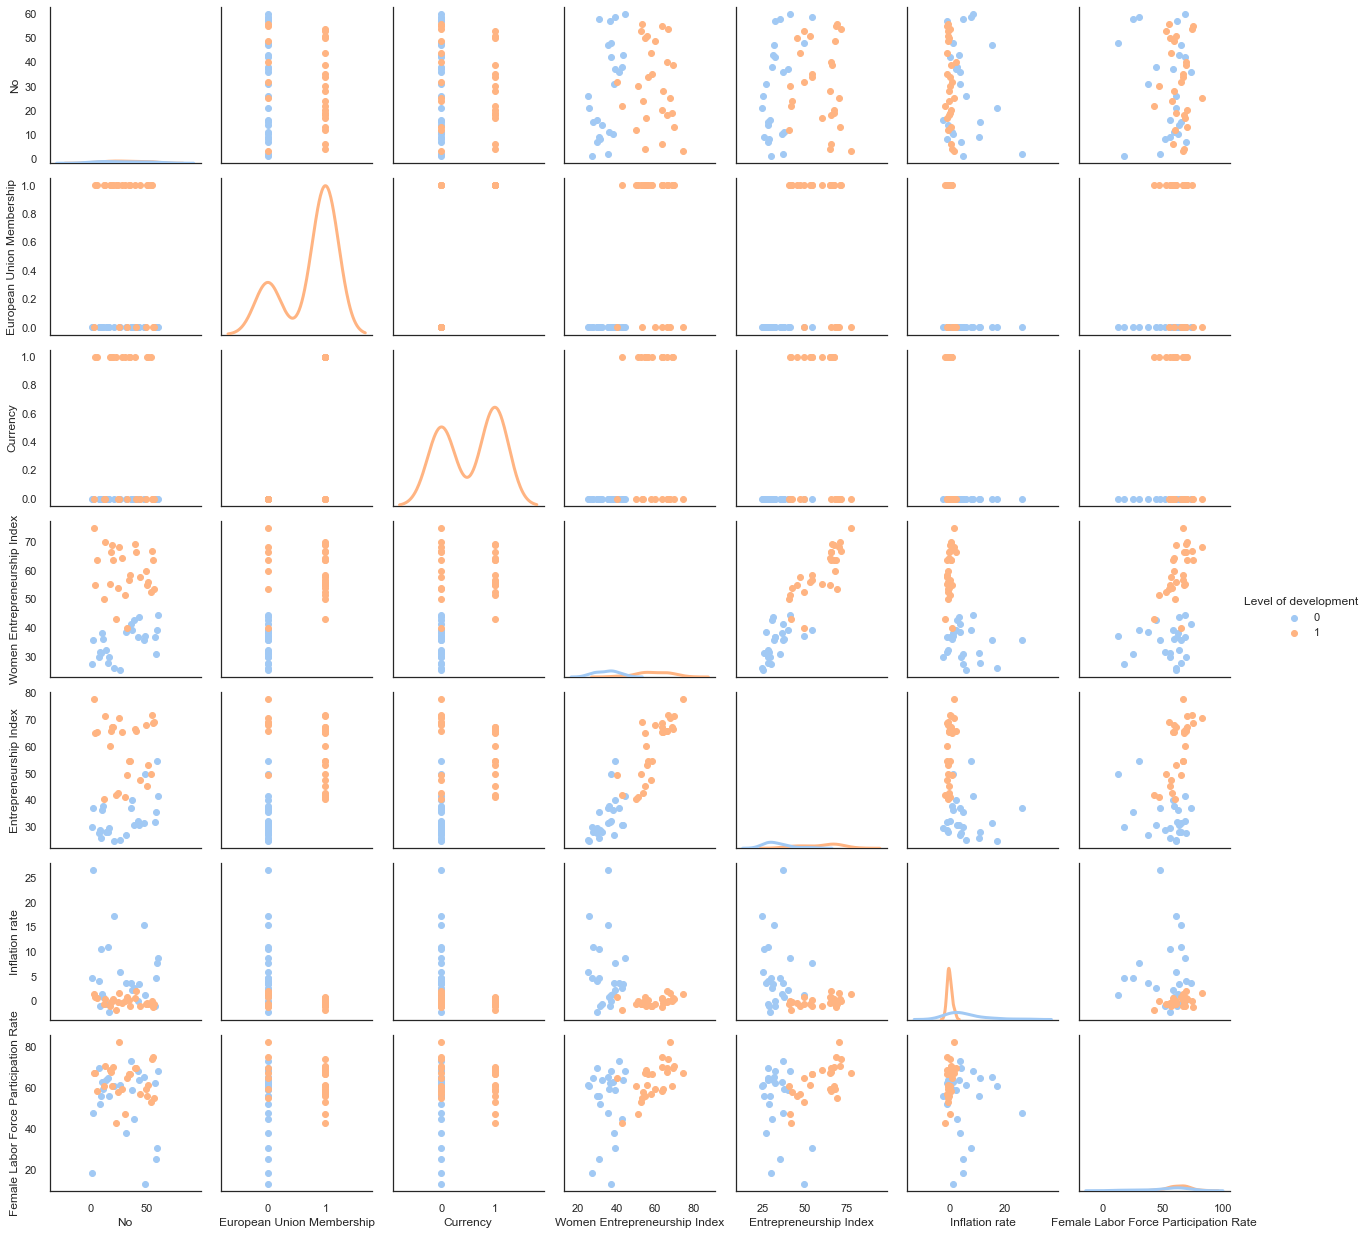

In [253]:
g = sns.PairGrid(df, hue='Level of development')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
g.add_legend()

In [254]:
normalized_df = (df_alterado-df_alterado.mean())/df_alterado.std()
normalized_df.head()

,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,0.93352,1.232724,1.53393,0.495127,1.090512,-0.313652,0.621601
1,0.93352,1.232724,1.53393,1.104862,1.127565,-0.369407,-0.034748
2,0.93352,1.232724,1.53393,0.530169,0.800266,-0.644467,0.722578
3,0.93352,1.232724,1.53393,1.301099,1.139916,-0.518088,0.664877
4,0.93352,1.232724,1.53393,1.469302,1.238723,-0.480918,0.152780


In [255]:
limit = int((normalized_df.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(normalized_df)
    pred = model.predict(normalized_df)
    score = silhouette_score(normalized_df, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.477
Silhouette Score for k = 3: 0.453
Silhouette Score for k = 4: 0.428
Silhouette Score for k = 5: 0.449


In [256]:
modelo = KMeans(n_clusters=2, n_init=100, max_iter = 200, random_state=0)
modelo.fit(normalized_df)

KMeans(max_iter=200, n_clusters=2, n_init=100, random_state=0)

In [257]:
modelo.cluster_centers_

array([[ 0.93352006,  0.70693835,  0.56812221,  0.8076519 ,  0.75612278,
        -0.47830246,  0.33277568],
       [-1.05021006, -0.79530564, -0.63913749, -0.90860838, -0.85063813,
         0.53809027, -0.37437264]])

In [258]:
clusters_ = modelo.labels_
clusters_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [259]:
cluster1 = df_alterado.copy()
cluster1['cluster'] = clusters_
cluster1.head()

,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,cluster
0,1,1,1,54.9,64.9,0.90,67.1,0
1,1,1,1,63.6,65.5,0.60,58.0,0
2,1,1,1,55.4,60.2,-0.88,68.5,0
3,1,1,1,66.4,65.7,-0.20,67.7,0
4,1,1,1,68.8,67.3,0.00,60.6,0


In [260]:
def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)
    centroids = modelo_v1.cluster_centers_
    inert = modelo_v1.inertia_
    sns.scatterplot(centroids[:,0], centroids[:,1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)


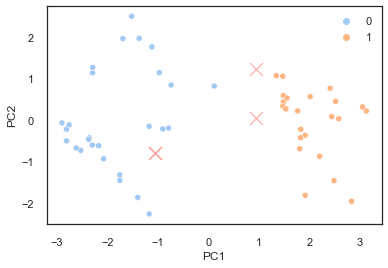

In [261]:
plot_cluster_points(normalized_df, modelo.labels_)

In [262]:
labels = modelo.labels_
silhouette_score(cluster1, labels, metric = 'euclidean')

0.4392207070130234

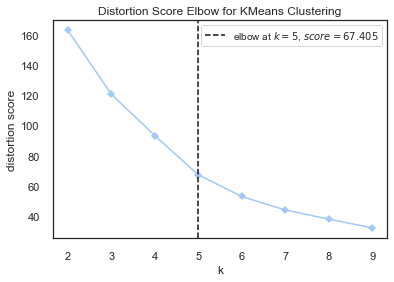

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [263]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(
    km, k=(2,10), metric='distortion', timings=False
)
visualizer.fit(normalized_df)        
visualizer.show() 

In [264]:
modelo_v1 = KMeans(n_clusters=5, n_init=100, max_iter = 200, random_state=0)
modelo_v1.fit(normalized_df)

KMeans(max_iter=200, n_clusters=5, n_init=100, random_state=0)

In [265]:
modelo_v1.cluster_centers_

array([[ 0.93352006,  0.0497066 , -0.63913749,  0.87416732,  0.90524849,
        -0.43662354,  0.53613178],
       [-1.05021006, -0.79530564, -0.63913749, -0.80944709, -0.89489553,
        -0.10231205,  0.21717897],
       [ 0.93352006,  1.23272375,  1.53392998,  0.75443955,  0.63682221,
        -0.5116456 ,  0.17009079],
       [-1.05021006, -0.79530564, -0.63913749, -1.16727877, -1.0943626 ,
         2.5250444 ,  0.02006808],
       [-1.05021006, -0.79530564, -0.63913749, -0.92758961, -0.48299293,
         0.34426262, -2.42515786]])

In [266]:
clusters = modelo_v1.labels_
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 1,
       1, 3, 4, 1, 4, 4, 1], dtype=int32)

In [267]:
cluster_df = df.copy()
cluster_df['cluster'] = clusters
cluster_df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,cluster
0,4,Austria,1,1,1,54.9,64.9,0.90,67.1,2
1,6,Belgium,1,1,1,63.6,65.5,0.60,58.0,2
2,17,Estonia,1,1,1,55.4,60.2,-0.88,68.5,2
3,18,Finland,1,1,1,66.4,65.7,-0.20,67.7,2
4,19,France,1,1,1,68.8,67.3,0.00,60.6,2


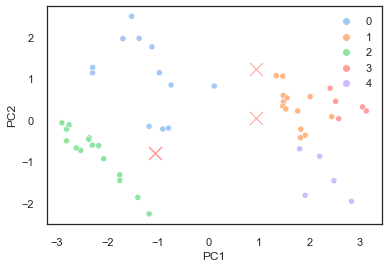

In [268]:
plot_cluster_points(normalized_df, modelo_v1.labels_)

In [269]:
cluster_df = df_alterado.copy()
cluster_df['cluster'] = modelo_v1.labels_
cluster_df['country'] = df.iloc[:,0]

In [270]:
cluster_df['cluster'].value_counts()

2    15
1    14
0    12
4     5
3     5
Name: cluster, dtype: int64

In [271]:
labels = modelo_v1.labels_
silhouette_score(cluster_df, labels, metric = 'euclidean')

0.05288090816155779

In [272]:
df2 = pd.read_csv("Dataset3.csv", sep=';')

In [335]:
cluster_df = df2.copy()
cluster_df['cluster'] = modelo_v1.labels_
cluster_df['country'] = df.iloc[:,0]

In [336]:
!pip install pivottablejs 
from pivottablejs import pivot_ui

In [337]:
pivot_ui(cluster_df)

In [ ]:
DBSCAN

In [276]:
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

In [277]:
from collections import Counter

In [278]:
valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'euclidean')
    agrupador.fit_predict(normalized_df)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(normalized_df) and Counter(labels)[0] > 1): #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(normalized_df, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [279]:
# pega o índice do vamior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))
# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print(eps_plot[ind])
print(min_samples_plot[ind])

1.9
6


In [280]:
print(max(valores_silhueta))

0.4570815242296384


In [281]:

dbscan = DBSCAN(eps = 1.9, min_samples = 6)
modelDB2D = dbscan.fit(normalized_df)
core_samples_mask = np.zeros_like(modelDB2D.labels_, dtype=bool)
core_samples_mask[modelDB2D.core_sample_indices_] = True
labelsDB2D = modelDB2D.labels_

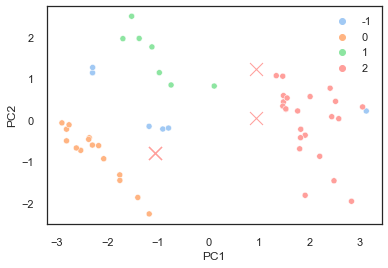

In [282]:
plot_cluster_points(normalized_df, modelDB2D.labels_)

In [283]:
cluster_db = df_alterado.copy()
cluster_db['cluster'] = modelDB2D.labels_

In [284]:
labels = labelsDB2D
silhouette_score(cluster_db, labels, metric = 'euclidean')

0.12976577600178907

In [285]:
cluster_db['cluster'].value_counts()

 2    23
 0    15
 1     7
-1     6
Name: cluster, dtype: int64

In [309]:
db_df = df_alterado.values

In [321]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(normalized_df)
distances, indices = nbrs.kneighbors(normalized_df)

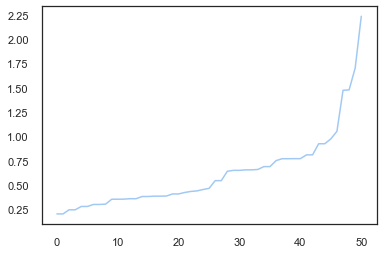

In [322]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [328]:
m = DBSCAN(eps=1.2, min_samples=5)
m.fit(normalized_df)

DBSCAN(eps=1.2)

In [329]:
clustersdb = m.labels_

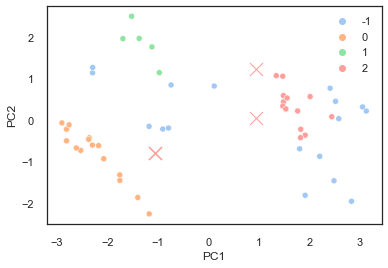

In [330]:
plot_cluster_points(normalized_df, m.labels_)

In [331]:
cluster_db2 = df_alterado.copy()
cluster_db2['cluster'] = m.labels_

In [332]:
labels = m.labels_
silhouette_score(cluster_db2, labels, metric = 'euclidean')

0.054295945003967894

In [333]:
cluster_db_ = df2.copy()
cluster_db_['cluster'] = m.labels_
cluster_db_['country'] = df.iloc[:,0]

In [334]:
pivot_ui(cluster_db_)

In [295]:
!pip install git+https://github.com/christopherjenness/DBCV.git@master

from DBCV import DBCV

  Cloning https://github.com/christopherjenness/DBCV.git (to revision master) to /private/var/folders/_8/xsxyz9hn3t583bb82cmryz2h0000gn/T/pip-req-build-gdzs1rai
  Running command git clone -q https://github.com/christopherjenness/DBCV.git /private/var/folders/_8/xsxyz9hn3t583bb82cmryz2h0000gn/T/pip-req-build-gdzs1rai
  Resolved https://github.com/christopherjenness/DBCV.git to commit db7345c45ab7d33ea500778e5c9048fd9f7d3156


In [310]:
DBCV_score = DBCV(db_df, labels, dist_function=euclidean)
print(DBCV_score)

nan


In [94]:
!pip install pivottablejs 
from pivottablejs import pivot_ui